**Importing libraries and data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

**Reading Dataset**

In [2]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Exploratory Data Analysis**

(0.0, 172792.0)

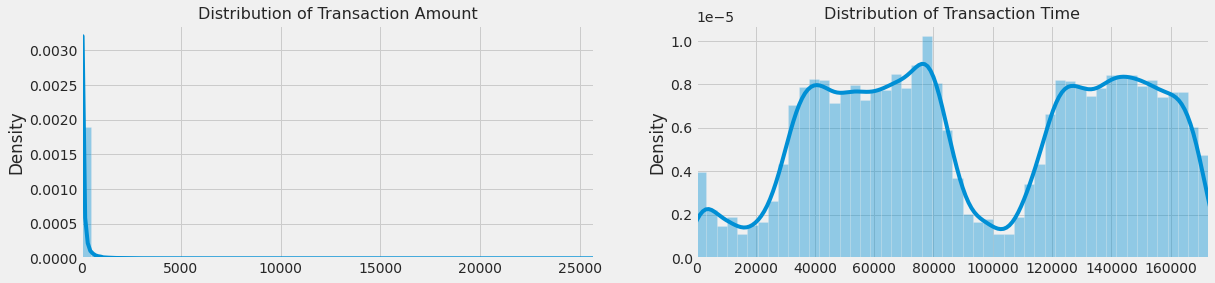

In [5]:
# check unscaled values: time and amount
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount', fontsize=16)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1])
ax[1].set_title('Distribution of Transaction Time', fontsize=16)
ax[1].set_xlim([min(time_val), max(time_val)])

Frauds: 492 ; 0.17 %
Non Frauds: 284315 ; 99.83 %


Text(0.5, 1.0, 'Class Distributions')

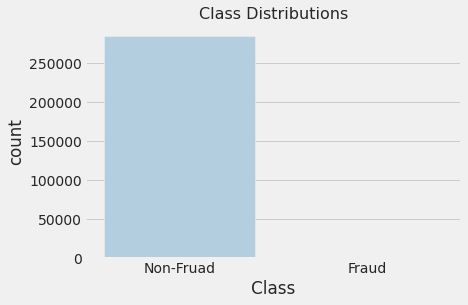

In [6]:
# check fraud and non-fraud transaction ratio
n_frauds = len(df[df['Class'] == 1])
n_non_frauds = len(df[df['Class'] == 0])
frauds_ptc = round(n_frauds / len(df['Class']) * 100, 2)
non_frauds_ptc = round(n_non_frauds / len(df['Class']) * 100, 2)
print('Frauds:', n_frauds, ";", frauds_ptc, "%")
print('Non Frauds:', n_non_frauds, ";", non_frauds_ptc, "%")

plt.subplots(figsize=(6, 4))
sns.countplot('Class', data = df, palette='Blues')
plt.xticks([0,1],['Non-Fruad','Fraud'])
plt.title('Class Distributions', fontsize = 16)

This dataset is severely imbalanced (most of the transactions are non-fraud). If we fit the whole dataset to a model, the model is more likely to classify a transaction to the majority class (non-fraud) and has a high accuracy rate. However, the model would have a high error in identifying minority class (fraud).

To address the problem of imbalanced datasets, we can use under-sampling to create a balanced dataset for training.

**Accuracy** is not a good matric to evaluate the model performance of imbalanced dataset because it will be usually high and misleading. Instead, we should use f1-score, precision/recall score or confusion matrix.

* True Positives : Correctly Classified Fraud Transactions <br/>
* False Positives: Incorrectly Classified Fraud Transactions <br/> 
* True Negative  : Correctly Classified Non-Fraud Transactions <br/>
* False Negative : Incorrectly Classified Non-Fraud Transactions <br/>
* Precision      : True Positives/(True Positives + False Positives) <br/>
* Recall         : True Positives/(True Positives + False Negatives) <br/>
* F1-score       : (2 * (Precision * Recall))/(Precision + Recall) <br/>

Precision is the ability of the classifier not to label a negative sample as positive.<br/>
Recall is the ability of the classifier to find all the positive samples.<br/>
F1-score is the harmonic mean of the precision and recall. It is used to compare the performance of classifiers. 

**Data Preprocessing**

In [7]:
# since most data have already been scaled, we only need to scale amount and time
ss = StandardScaler()
rs = RobustScaler()

# 'amount' is scaled by robust scaler which is less prone to outliers
scaled_time = ss.fit_transform(df['Time'].values.reshape(-1,1))
scaled_amount = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)

df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996562,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996541,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [8]:
X = df.drop('Class', axis=1)
y = df['Class']

# create an under-sampled dataset
df = df.sample(frac=1)

fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0][:492]

new_df = pd.concat([fraud_df, non_fraud_df])
new_df = new_df.sample(frac=1)

X_us = new_df.drop('Class', axis=1)
y_us = new_df['Class']

print('Counts of lable on the original dataset:')
print("Counts of label '1': {}".format(sum(y==1)))
print("Counts of label '0': {}".format(sum(y==0)))
print('')

print('Counts of lable on the under-sampled dataset:')
print("Counts of label '1': {}".format(sum(y_us==1)))
print("Counts of label '0': {}".format(sum(y_us==0)))
print('')

Counts of lable on the original dataset:
Counts of label '1': 492
Counts of label '0': 284315

Counts of lable on the under-sampled dataset:
Counts of label '1': 492
Counts of label '0': 492



**Plotting a Correlation Matrix**

Text(0.5, 1.0, 'Correlation Matrix')

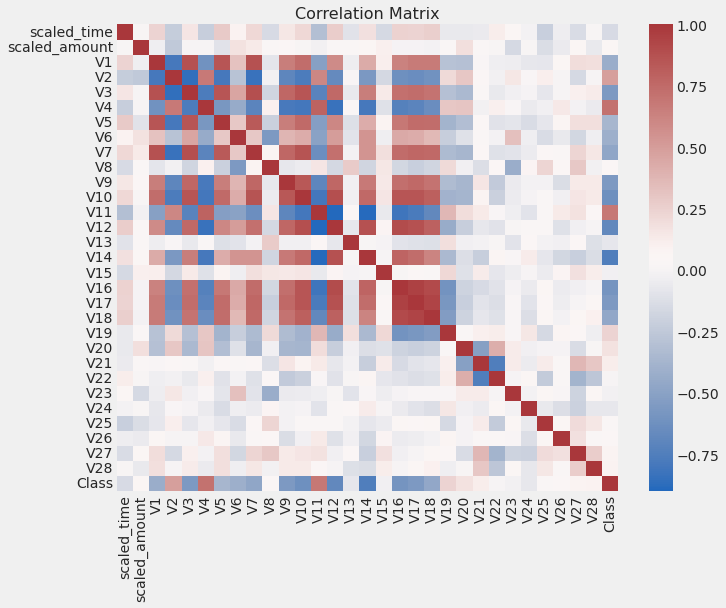

In [9]:
plt.subplots(figsize=(10, 8))
sns.heatmap(new_df.corr(), cmap='vlag')
plt.title('Correlation Matrix', fontsize=16)

V2, V4 and V11 are positively correlated to the output while V1, V3, V7, V9, V10, V12, V14, V16, V17 and V18 are negatively corrected to the output.

**Splitting the dataset into training and testing set**

In [10]:
# Original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print('No. of transaction on the original train dataset: ', len(X_train))
print('No. of transaction on the original test dataset: ', len(X_test))
print('Total no. of transaction: ', len(X_train) + len(X_test))
print('')

# under-sampled dataset
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us,y_us,test_size = 0.2)

print('No. of transaction on the under-sampled train dataset: ', len(X_train_us))
print('No. of transaction on the under-sampled test dataset: ', len(X_test_us))
print('Total no. of transaction: ', len(X_train_us) + len(X_test_us))
print('')

No. of transaction on the original train dataset:  227845
No. of transaction on the original test dataset:  56962
Total no. of transaction:  284807

No. of transaction on the under-sampled train dataset:  787
No. of transaction on the under-sampled test dataset:  197
Total no. of transaction:  984



**Model fitting with GridSearchCV**

We will train and test four models including logistic regression (LR), k-nearest neighbors (KNN), support vector machines (SVM), and random forest (RF). 

GridSearchCV is implemented to find the best parameters.

Logistic Regression

In [11]:
lr_params = {'penalty': ['l1', 'l2'], 
             'C': [0.01, 0.1, 1, 10, 100, 1000]}

t0 = time.time()
grid_lr = GridSearchCV(LogisticRegression(), lr_params)
grid_lr.fit(X_train_us, y_train_us)
t1 = time.time()

t2 = time.time()
lr = grid_lr.best_estimator_
lr_y_pred = lr.predict(X_test_us)
t3 = time.time()

print('Logistic Regression took {:.2f} s in training and {:.2} s in prediction with parameters {}. \n'.format((t1 - t0), (t3 - t2), grid_lr.best_params_))
print(classification_report(y_test_us, lr_y_pred))

Logistic Regression took 1.20 s in training and 0.0029 s in prediction with parameters {'C': 0.1, 'penalty': 'l2'}. 

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       100
           1       1.00      0.93      0.96        97

    accuracy                           0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.97      0.96      0.96       197



K-nearest Neighbors

In [12]:
knn_params = {'n_neighbors': [3, 5],
              'algorithm': ['auto', 'ball_tree', 'kd_tree']}

t0 = time.time()
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
grid_knn.fit(X_train_us, y_train_us)
t1 = time.time()

t2 = time.time()
knn = grid_knn.best_estimator_
knn_y_pred = knn.predict(X_test_us)
t3 = time.time()
 
print('K-nearest Neighbors took {:.2f} s in training and {:.2} s in prediction with parameters {}. \n'.format((t1 - t0), (t3 - t2), grid_knn.best_params_))
print(classification_report(y_test_us, knn_y_pred))

K-nearest Neighbors took 0.50 s in training and 0.013 s in prediction with parameters {'algorithm': 'auto', 'n_neighbors': 3}. 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       100
           1       0.96      0.94      0.95        97

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



Support Vector Machines

In [13]:
svc_params = {'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [0.1, 1, 10, 100],
              'C': [0.01, 0.1, 1, 10, 100, 1000],
              'degree': [2, 3, 4, 5, 6]}

t0 = time.time()
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train_us, y_train_us)
t1 = time.time()

t2 = time.time()
svc = grid_svc.best_estimator_
svc_y_pred = svc.predict(X_test_us)
t3 = time.time()

print('Support Vector Machines took {:.2f} s in training and {:.2} s in prediction with parameters {}. \n'.format((t1 - t0), (t3 - t2), grid_svc.best_params_))
print(classification_report(y_test_us, svc_y_pred))

Support Vector Machines took 953.12 s in training and 0.0027 s in prediction with parameters {'C': 1000, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}. 

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       100
           1       1.00      0.93      0.96        97

    accuracy                           0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.97      0.96      0.96       197



Random Forest

In [14]:
rf_params = {'n_estimators': [25, 50, 75],
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth': [3, 5, 7],
             'criterion': ['gini', 'entropy', 'log_loss']}

t0 = time.time()
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_train_us, y_train_us)
t1 = time.time()

t2 = time.time()
rf = grid_rf.best_estimator_
rf_y_pred = rf.predict(X_test_us)
t3 = time.time()

print('Random Forest took {:.2f} s in training and {:.2} s prediction with parameters {}. \n'.format((t1 - t0), (t3 - t2), grid_rf.best_params_))
print(classification_report(y_test_us, rf_y_pred))

Random Forest took 33.50 s in training and 0.0046 s prediction with parameters {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 25}. 

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       100
           1       1.00      0.93      0.96        97

    accuracy                           0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.97      0.96      0.96       197



**Plotting a Confusion Matrix**

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

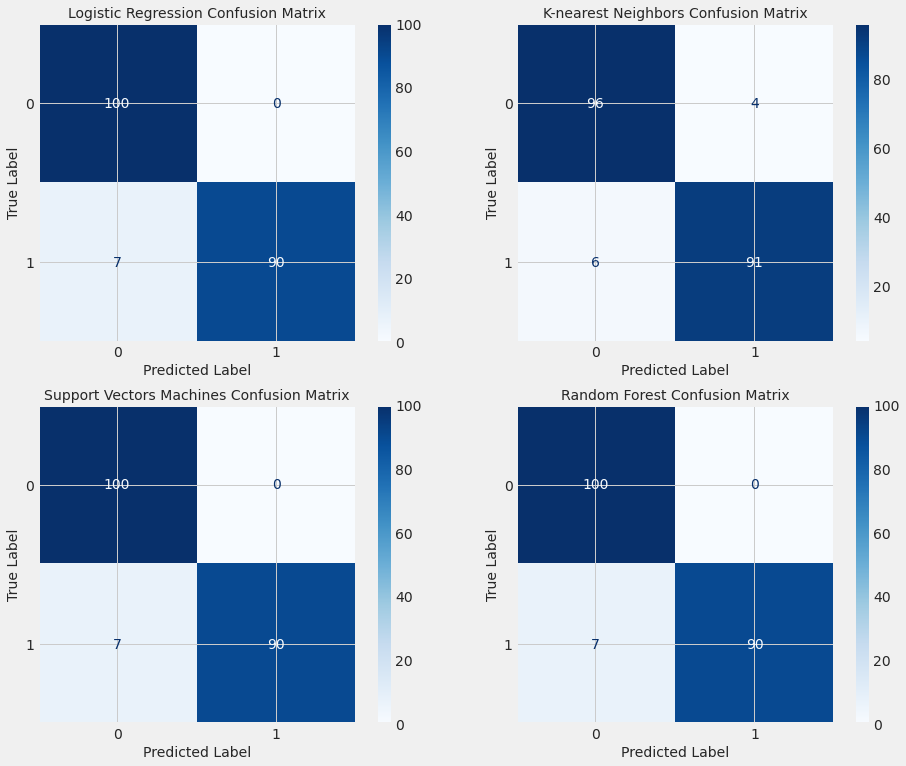

In [15]:
fig, ax = plt.subplots(2, 2, figsize = (14,12))

lr_cnf = ConfusionMatrixDisplay.from_predictions(y_test_us, lr_y_pred, ax = ax[0][0], cmap = 'Blues')
ax[0][0].set_ylabel('True Label', fontsize = 14)
ax[0][0].set_xlabel('Predicted Label', fontsize = 14)
ax[0][0].set_title('Logistic Regression Confusion Matrix', fontsize = 14)

knn_cnf = ConfusionMatrixDisplay.from_predictions(y_test_us, knn_y_pred, ax = ax[0][1], cmap = 'Blues')
ax[0][1].set_ylabel('True Label', fontsize = 14)
ax[0][1].set_xlabel('Predicted Label', fontsize = 14)
ax[0][1].set_title('K-nearest Neighbors Confusion Matrix', fontsize = 14)

svc_cnf = ConfusionMatrixDisplay.from_predictions(y_test_us, svc_y_pred, ax = ax[1][0], cmap = 'Blues')
ax[1][0].set_ylabel('True Label', fontsize = 14)
ax[1][0].set_xlabel('Predicted Label', fontsize = 14)
ax[1][0].set_title('Support Vectors Machines Confusion Matrix', fontsize = 14)

rf_cnf = ConfusionMatrixDisplay.from_predictions(y_test_us, rf_y_pred, ax = ax[1][1], cmap = 'Blues')
ax[1][1].set_ylabel('True Label', fontsize = 14)
ax[1][1].set_xlabel('Predicted Label', fontsize = 14)
ax[1][1].set_title('Random Forest Confusion Matrix', fontsize = 14)

**Plotting a Precision Recall Curve**

Text(0, 0.5, 'Precision')

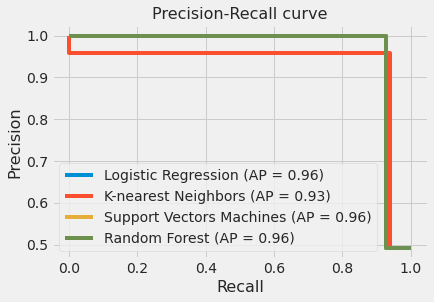

In [16]:
PrecisionRecallDisplay.from_predictions(y_test_us, lr_y_pred, ax = plt.gca(), name = 'Logistic Regression')
PrecisionRecallDisplay.from_predictions(y_test_us, knn_y_pred, ax = plt.gca(), name = 'K-nearest Neighbors')
PrecisionRecallDisplay.from_predictions(y_test_us, svc_y_pred, ax = plt.gca(), name = 'Support Vectors Machines')
PrecisionRecallDisplay.from_predictions(y_test_us, rf_y_pred, ax = plt.gca(), name = 'Random Forest')

plt.title('Precision-Recall curve', fontsize = 16)
plt.xlabel('Recall',fontsize = 16)
plt.ylabel('Precision',fontsize = 16)

All fours models have AP over 0.9, which is an excellent result. LR, SVM and RF have slightly higher AP compared to KNN. In terms of runtime, LR and KNN are notably shorter. Combining the two factors, LR is the best estimator among the four models.